<a href="https://colab.research.google.com/github/susanavillar/APRENDIZAJE_AUTOMATICO_23_24/blob/main/2_4_Perceptron_y_Adaline_Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrenando Algoritmos de Machine Learning para Clasificación

# Implementando un algoritmo de aprendizaje tipo Perceptrón en Python: Una API de Perceptrón orientada a Objetos

In [ ]:
import numpy as np


class Perceptron(object):
    """Clasificador basado en perceptron.

     Parámetros
     ------------
     eta: float
       Tasa de aprendizaje (entre 0,0 y 1,0)
     n_iter: int
       Pasos sobre el conjunto de datos de entrenamiento.
     random_state: int
       Semilla del generador de números aleatorios para
       inicialización de los pesos de forma aleatoria.

     Atributos
     -----------
     w_: matriz-1d (1d-array)
       Pesos después del fitting.
     errors_: list
       Número de clasificaciones erróneas (actualizaciones) en cada época.

     """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Ajustar pesos con los datos de entrenamiento.

         Parámetros
         ----------
         X: {tipo-array}, shape = [n_samples, n_features]
           Vectores de entrenamiento, donde n_samples es el número de muestras y
           n_features es el número de características.
         y: tipo-array, shape = [n_samples]
           Valores objetivo.

         Retorno
         -------
         self: objet

         """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi)) # Actualización de pesos (predicción erronea --> regla de Hebb)
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calcular la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Devolver etiqueta de clase después del paso unitario"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

0.0

## Entrenando un modelo de Perceptrón en el conjunto de datos Iris

### Leyendo el dataset Iris

In [ ]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<hr>

### Nota:
Si tenéis el fichero ya descargado en un directorio local, por ejemplo en "your/local/path/to/iris.data" podéis sustituir la anterior línea de código...

    df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)

por...

    df = pd.read_csv('your/local/path/to/iris.data', header=None)


<hr>

### Pintando los datos de Iris

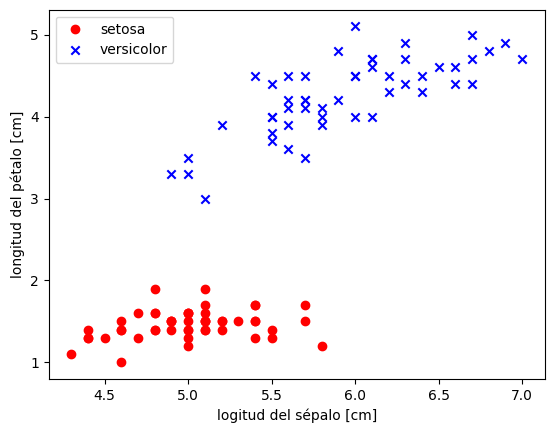

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# selecciona setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extrae longitud del sépalo y del pétalo
X = df.iloc[0:100, [0, 2]].values

# pintando los datos
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('logitud del sépalo [cm]')
plt.ylabel('longitud del pétalo [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

### Entrenando el modelo Perceptrón

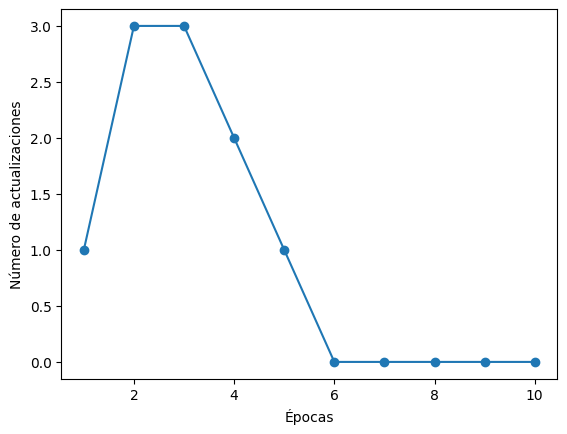

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=10) # Perceptrón con tasa de aprendizaje  0.1 y nº iteraciones 10.
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Número de actualizaciones')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

### ANÁLISIS DE LA GRÁFICA

En cada época, el perceptrón realiza ajustes en sus pesos en un intento de mejorar su capacidad de clasificación y cada vez que el perceptrón comete un error al clasificar un ejemplo durante una época, se cuenta como produce una actualización de pesos.La gráfica muestra cómo cambia el número de errores a medida que el perceptrón avanza en las épocas.

Podemos observar que el número de errores disminuye a medida que aumentan las épocas, y el perceptrón aprende a clasificar mejor los datos. Esto indica que el perceptrón se está ajustando y mejorando su capacidad de clasificación a lo largo del entrenamiento.

En el caso de que la gráfica mostrase oscilaciones o una meseta en el número de errores, podría ser necesario ajustar los parámetros del perceptrón o recopilar más datos de entrenamiento para obtener una mejor convergencia.


### Una función para pintar las regiones de decisión

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # configuramos el generador de marcadores y mapa da colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # traza/pinta la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # pinta las muestras de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

<ipython-input-7-fa4da9849d57>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


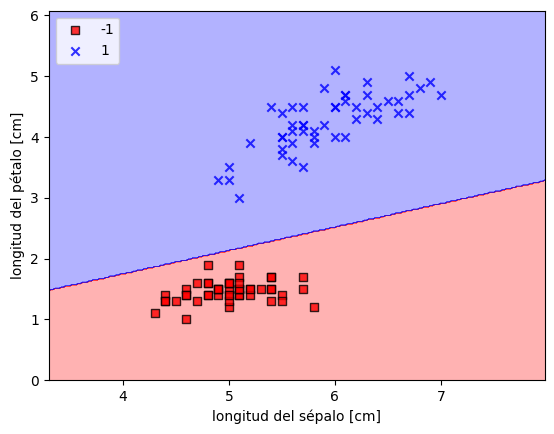

In [ ]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('longitud del sépalo [cm]')
plt.ylabel('longitud del pétalo [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()

### ANÁLISIS DE LA GRÁFICA

Esta gráfica es una representación visual de cómo un clasificador (un perceptrón)  divide el espacio bidimensional en regiones de decisión para dos clases diferentes (setosa y versicolor).

Observamos dos áreas claras de diferenciación la azul y la roja, estas son regiónes de decisión del clasificador(especies de iris ). Las muestras que caen dentro de una región de decisión se asignarán a esa clase específica. La frontera de clasificación es aquella que separa un area de otra.
Los datos que esten mas cerca de la frontera son aquellos en que las muestras pueden ser clasificadas de manera más incierta o donde las clases están más cerca entre sí y los que se encuentren mas lejos son aquellos.

Está gráfica es muy útil, porque nos permite ver cada elemento con su etiqueta (cruz azul -> versicolor ; cuadrado rojo -> setosa), y la clasificación que ha hecho nuestro perceptrón al mismo tiempo. Así podemos comprobar que todas las cruces azules estan en el área azul, creada por nuestro clasificador, mientras que todos los cuadrados rojos están dentro del área rojo.

# Neurona lineales Adaptativas (ADALINE) y la convergencia del aprendizaje: Implementando una ADALINE en Python

In [ ]:
class AdalineGD(object):
    """Clasificador ADptive LInear NEuron. ADALINE

     Parámetros
     ------------
     eta: float
       Tasa de aprendizaje (entre 0,0 y 1,0)
     n_iter: int
        Pasos sobre el conjunto de datos de entrenamiento.
     random_state: int
       Semilla del generador de números aleatorios para
       inicialización de los pesos de forma aleatoria.

     Atributos
     -----------
     w_: array-1d
       Pesos después del entrenamiento.
     cost_: list
       Valor de la función de coste (suma de cuadrados) en cada época.

     """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Ajustar pesos con los datos de entrenamiento.

         Parámetros
         ----------
         X: {tipo-array}, shape = [n_samples, n_features]
           Vectores de entrenamiento, donde n_samples es el número de muestras y
           n_features es el número de características.
         y: tipo-array, shape = [n_samples]
           Valores objetivo.

         Retorno
         -------
         self: objet

         """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Tened en cuenta que el método de "activation" no tiene ningún efecto
            # en el código ya que es simplemente una función de identidad. Nosotros
            # podría escribir `output = self.net_input(X)` directamente en su lugar.
            # El propósito del activation es más conceptual, es decir,
            # en el caso de la regresión logística, podríamos cambiarlo a
            # una función sigmoidea para implementar un clasificador de regresión logística.
            output = self.activation(net_input)
            errors =errors = y - self.activation(net_input)  # Calcula los errores
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calcular la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Computar la activación lineal"""
        return X

    def predict(self, X):
        """Devolver etiqueta de clase después del paso unitario"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

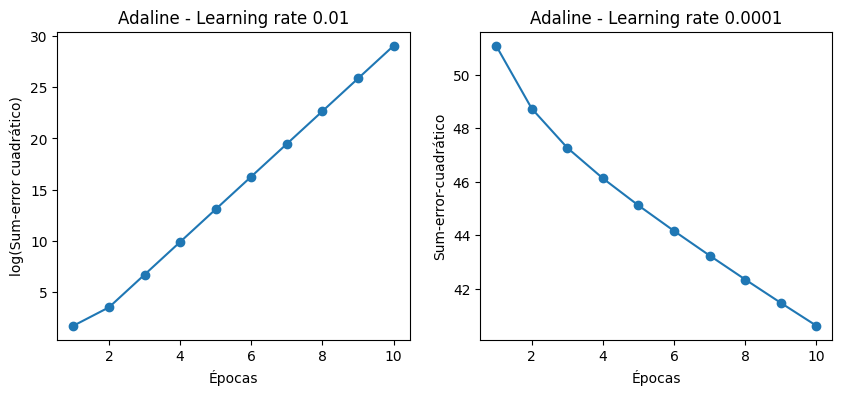

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = ada1 = AdalineGD(n_iter=10, eta=0.01) # Adaline con 10 iteraciones y tasa de aprendizaje 0.1
ada1.fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Épocas')
ax[0].set_ylabel('log(Sum-error cuadrático)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Épocas')
ax[1].set_ylabel('Sum-error-cuadrático')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

### ANÁLISIS DE LAS GRÁFICAS
Las gráficas muestran el efecto de dos tasas de aprendizaje (learning rates) diferentes en el rendimiento de el modelo Adaline durante el proceso de entrenamiento.
###Gráfica de la izquierda (Adaline - Learning rate 0.01):

Esta gráfica muestra cómo cambia la suma del error cuadrático a medida que el modelo Adaline se entrena durante 10 épocas.
En el eje x encontramos representadas las épocas mientras que en el eje y tenemos el logaritmo de la suma del error cuadrático, el logaritmo se utiliza para hacer que las diferencias en el error sean más visibles en la gráfica.

Como podemos observar el error cuadrático aumenta a medida que aumentan las épocas, este no es el resultado esperado, esto sucede debido a que la tasa de aprendizaje (eta) de 0.01 en el modelo Adaline es que puede ser demasiado grande para el conjunto de datos y el proceso de entrenamiento.Cuando la tasa de aprendizaje es demasiado alta, el proceso de optimización puede oscilar y nunca converger hacia una solución óptima.



###Gráfica de la derecha (Adaline - Learning rate 0.0001):

Esta gráfica muestra cómo cambia la suma del error cuadrático a medida que el modelo Adaline se entrena durante 10 épocas.
En el eje x encontramos representadas las épocas mientras que en el eje y tenemos la suma del error cuadrático.
Esta gráfica es similar a la de la izquierda, pero muestra el efecto de una tasa de aprendizaje más pequeña (0.0001).

 La tasa de aprendizaje más pequeña permite pasos más pequeños en la dirección del mínimo global de la función de coste, lo que lleva a la convergencia del modelo al contrario que en la gráfica de la izquierda. Podemos observar que a mas épocas menos error cuadrático.

 La **elección de la tasa de aprendizaje** es un hiperparámetro crítico en el entrenamiento de modelos como Adaline. Una tasa de aprendizaje demasiado alta puede resultar útil en problemas de convergencia, mientras que una tasa de aprendizaje demasiado baja puede hacer que el proceso de entrenamiento sea muy lento

## Mejorando el Gradiente Descendente con escalado de características

In [ ]:
# Estandarizar características
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()


<ipython-input-7-fa4da9849d57>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


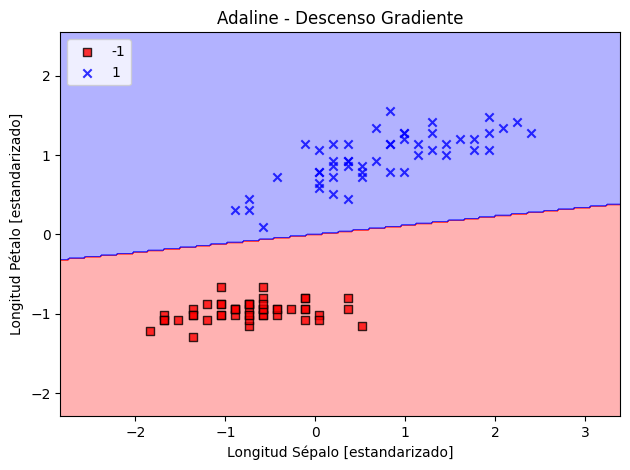

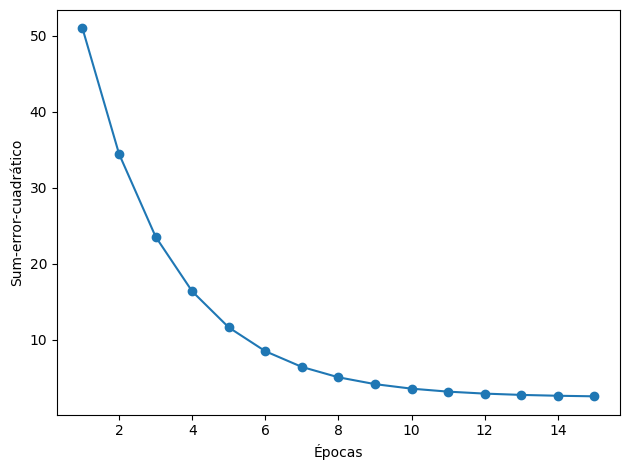

In [ ]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Descenso Gradiente')
plt.xlabel('Longitud Sépalo [estandarizado]')
plt.ylabel('Longitud Pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Sum-error-cuadrático')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

### ANÁLISIS DE LAS GRÁFICAS
###Gráfica de la región de decisión:

Observando graficamente cómo el modelo divide el espacio de características en las dos clases (flores iris), vemos que hace una buena clasificación de las muestras.
Las características estandarizadas se utilizan en el gráfico, y se muestra la longitud del sépalo en el eje x y la longitud del pétalo en el eje y.


###Gráfica de la función de coste durante el entrenamiento **error cuadratico**

Se grafica cómo cambia la función de coste (suma del error cuadrático) a medida que avanza el entrenamiento.
Esta gráfica muestra cómo el modelo Adaline con descenso de gradiente mejora a medida que avanza el proceso de entrenamiento. El objetivo sería minimizar esta función de coste, y la gráfica debía mostrar una reducción gradual del error. Como podemos observar es justamente lo que ocurre.

Se observa que la dismunución del error cuadrático es relativamente rápida, en la época 10 el error ya es muy pequeño. Hay que tener en cuenta que hemos empleado una tasa de aprendizaje que antes caracterizamos como alta (0.1)




## Aprendizaje Automático a Gran Escala y Descendiente de Gradiente Estocástico

In [ ]:
class AdalineSGD(object):
    """Clasificador ADptive LInear NEuron. ADALINE

     Parámetros
     ------------
     eta: float
       Tasa de aprendizaje (entre 0,0 y 1,0)
     n_iter: int
        Pasos sobre el conjunto de datos de entrenamiento.
     shuffle : bool (default: True)
      Si es Verdadero, mezcla los datos de entrenamiento en cada época, para evitar ciclos.
     random_state: int
       Semilla del generador de números aleatorios para
       inicialización de los pesos de forma aleatoria.

     Atributos
     -----------
     w_: array-1d
       Pesos después del entrenamiento.
     cost_: list
       Valor de la función de coste (suma de cuadrados) promediado sobre todas las muestras
       de entrenamiento en cada época.

     """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Ajustar pesos con los datos de entrenamiento.

         Parámetros
         ----------
         X: {tipo-array}, shape = [n_samples, n_features]
           Vectores de entrenamiento, donde n_samples es el número de muestras y
           n_features es el número de características.
         y: tipo-array, shape = [n_samples]
           Valores objetivo.

         Retorno
         -------
         self: objet

         """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Ajustar pesos con los datos de entrenamiento sin reinicializar los pesos"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Mezclar los datos de entrenamiento"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Inicializar pesos con pequeños números aleatorios"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Aplicar la regla de aprendizaje de Adaline para actualizar los pesos"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calcular la entrada neta"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Calcular la activación lineal"""
        return X

    def predict(self, X):
        """Devolver etiqueta de clase después del paso unitario"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

<ipython-input-7-fa4da9849d57>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


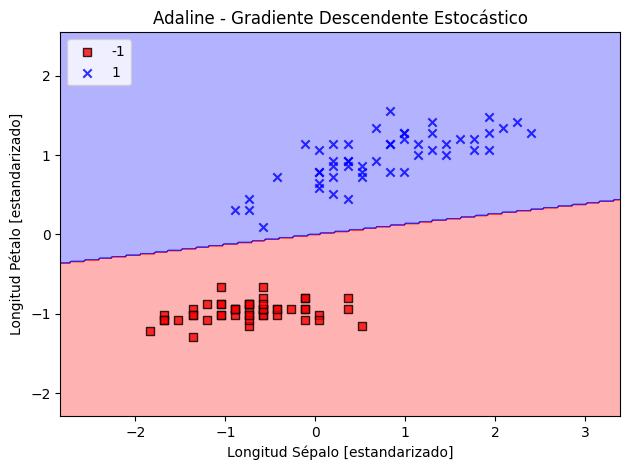

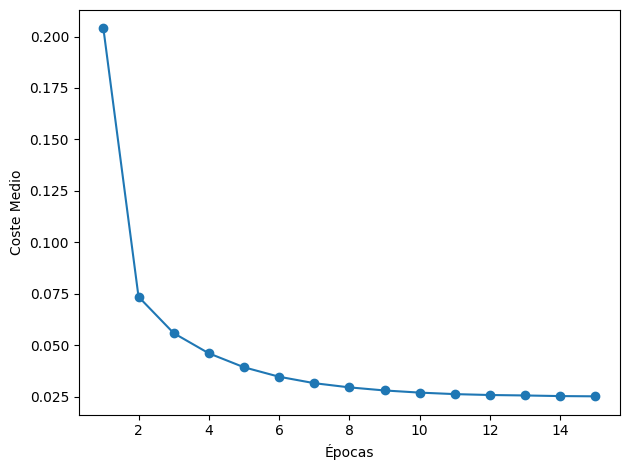

In [ ]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradiente Descendente Estocástico')
plt.xlabel('Longitud Sépalo [estandarizado]')
plt.ylabel('Longitud Pétalo [estandarizado]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Épocas')
plt.ylabel('Coste Medio')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

### ANÁLISIS DE LAS GRÁFICAS

En la primera gráfica vemos una nueva división de las dos regiones, con un modelo adaline que emplea el descenso de gradiente estocástico.
De nuevo la clasificación que realiza nuestro modelo es muy buena, ya que todas las muestras caen dentro de la región correcta.

Por ello pasamos a estudiar el coste medio para este nuevo modelo.

Se observa en primer lugar como el coste medio disminuye con el paso de las épocas lo que es indicativo de que el modelo esta aprendiendo.

Sin embargo en la gráfica se ve rápidamente una clara variación respecto a las anteriores. En las 2 primeras épocas el error disminuye muy rápidamente, no tan progresivamente como lo hacía en los modelos anteriores.

A parti de la época 8 el error es ya muy bajo, y por cada época que pasa disminuye menos de lo que lo hacía en las pimeras.



In [ ]:
ada.partial_fit(X_std[0, :], y[0])

# Resumen

In [ ]:
! python ../.convert_notebook_to_script.py --input 2_4_Perceptron_y_Adaline.ipynb --output 2_4_Perceptron_y_Adaline.py

python3: can't open file '/content/../.convert_notebook_to_script.py': [Errno 2] No such file or directory
